<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Introducción al Aprendizaje Automático -> Grupo 10 Cohorte 2</h1>

Rodrigo Bertoya

Agustin Mauras Velez 

Gabriel Moyano

Marcelo Tisera

Silvia Pierotti

Fernandez María Soledad   


# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
sns.set(style="whitegrid")

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston['DESCR'])   # descripción del dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston['data']           # matriz con los datos de entrada (atributos)

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston['target']         # vector de valores a predecir

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [9]:
boston['data'], boston['feature_names']

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [10]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

### 1.1 ¿De qué se trata el conjunto de datos?

El conjunto de datos de este modelo proviene del Repositorio de aprendizaje de máquinas de la UCI. Estos datos se recopilaron en 1978 y cada una de las 506 entradas representa datos agregados sobre 14 características para hogares de diversos suburbios en Boston. La base de datos Boston Housing contiene los datos originales de Harrison y Rubinfeld (1979), el marco de datos BostonHousing 2 es la versión corregida con información espacial adicional.

### 1.2 ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

La variable objetivo o independiente a predecir es el valor de una vivienda de acuerdo a las características de la misma. Dichas características o features son las que informa el dataset seleccionado. Note que la matrix *target* del dataset de boston es la que usaremos para corroborar si el modelo seleccionado es el adecuado para la predicción o no, esta se corresponde con la variable MEDV  Valor medio de viviendas ocupadas por sus propietarios en dólares (expresado en miles 1000)

### 1.3 ¿Qué información (atributos) hay disponibles para hacer la predicción?

### Conjunto de datos de precios de vivienda de Boston

##### Características del conjunto de datos

Número de instancias: 506

Número de atributos: 13 numérico / categórico predictivo. 

El valor medio (atributo 14) suele ser el objetivo.

Información de atributo (en orden):

        - Tasa de criminalidad CRIM per cápita por ciudad
        
        - Proporción ZN de tierra residencial dividida en zonas para lotes de más de 25,000 pies cuadrados.
        
        - Proporción INDUS de acres de negocios no minoristas por ciudad
        
        - Variable ficticia CHAS Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
        
        - Concentración de óxidos nítricos NOX (partes por 10 millones)
        
        - RM promedio de habitaciones por vivienda
        
        - AGE Proporción de edad de las unidades ocupadas por el propietario construidas antes de 1940
        
        - Distancias ponderadas DIS a cinco centros de empleo de Boston
        
        - Indice RAD de accesibilidad a carreteras radiales
        
        - IMPUESTO tasa de impuesto a la propiedad de valor total por 10.000
        
        - PTRATIO relación alumno-profesor por localidad
        
        - B 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad
        
        - LSTAT% es el porcentaje de propietarios en el vecindario considerado de clase baja.
        
        - MEDV Valor medio de viviendas ocupadas por sus propietarios en dólares (expresado en miles 1000)

### 1.4 ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?

Podemos decir que las features más determinantes son :
- *RM* Promedio de habitaciones por vivienda
- *LSTAT* Porcentaje de propietarios en el vecindario considerado de clase baja.
- *AGE* Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- *MEDV* Valor medio de viviendas ocupadas por sus propietarios en dólares (expresado en miles 1000)

### 1.5 ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

Podemos realizar las siguientes suposiciones a priori en base a las características que tiene el data set:

- La feature DIS y CHAS hace que la predicción usando estas features sea solo útil para Boston, que pasa con áreas rurales u otras ciudades?
- El porcentaje de la población de color es relevante a la hora de valuar una propiedad, lo cual nos plantea un dilema ético, esta feature no es aplicable a otras regiones o países.
- La valuacion de la propiedad en dolares deberá tenerse en cuenta para predecir en otros paises donde los activos no se valuan en dicha moneda al igual que la variable impuesto donde las tasas difieren entre ciudades
- El conjunto de datos considerado es bastante limitado, hay muchas características como la tamaño de la casa en metros cuadrados, la presencia de piscina o no y otros, que son muy relevantes cuando se considera el precio de una vivienda
- Los datos recopilados a partir de 1978 no tienen mucho valor en el mundo actual, la sociedad y la economía han cambiado mucho y, además, la inflación ha tenido un gran impacto en los precios, más en países como el nuestro.
- No parece apropiado predecir el precio de una vivienda individual según las características de todo el barrio, ya que en dicho barrio puede haber una gran variación en los precios

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Visualización de los Datos

In [11]:
pd.DataFrame(X, columns=boston['feature_names']).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### 2.1 Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.

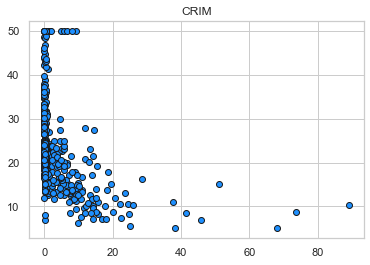

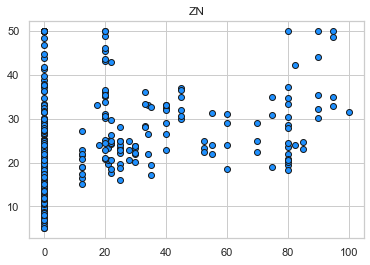

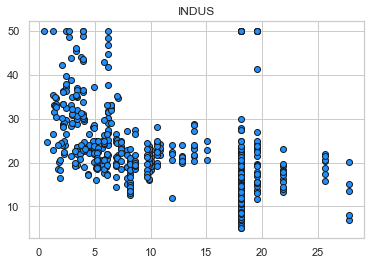

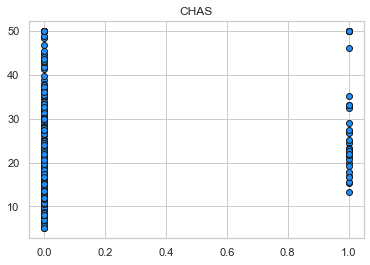

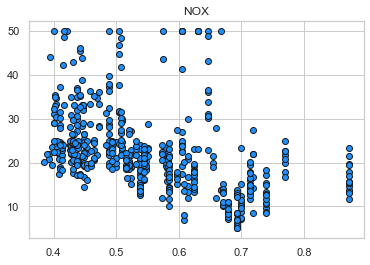

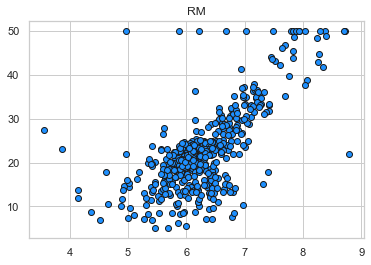

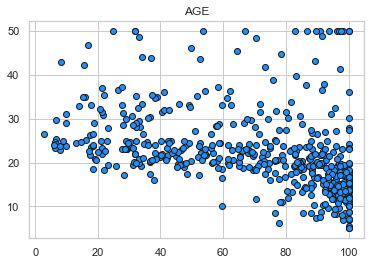

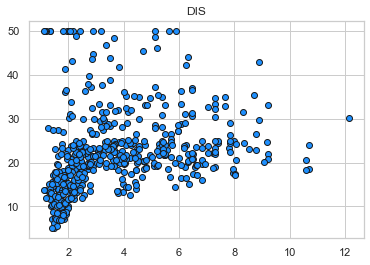

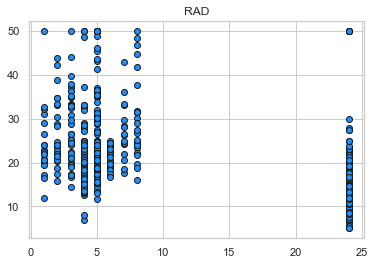

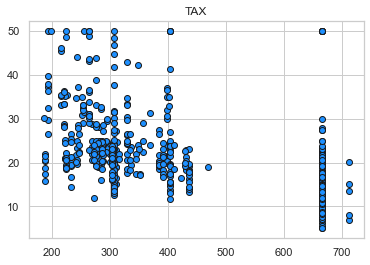

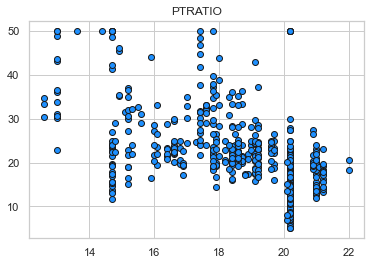

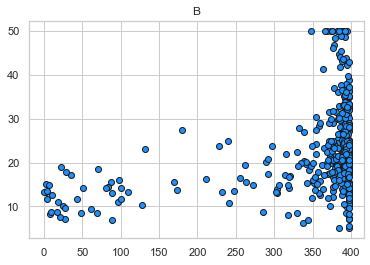

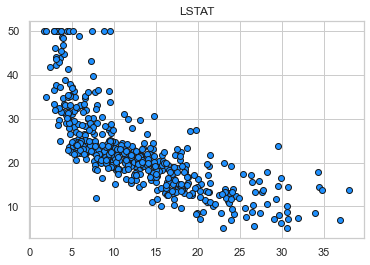

In [12]:
# y es la variable target u objetivo, verificar feature de x contra el eje de las y que es el valor de la propiedad

for feature in boston.feature_names:
    selector = (boston['feature_names'] == feature)
    plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.title(feature)
    plt.show()

### 2.2 Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.

Podemos detectar que existe cierta correlación entre la variable objetivo y las siguientes features:

- LSTAT
- RM 
- CRIM
- B
- DIS
- AGE

### 2.3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

De acuerdo a su grafica podemos mencionar que las features que pueden ser más relevantes a la hora de la predicción son:

*Mas significativas*
- LSTAT
- RM 
- CRIM

*Menos significativas*
- B
- DIS
- AGE

### Nota: 

A continuacion mostramos las características generales del dataset sobre el cual estamos trabajando

In [13]:
pd.DataFrame(X, columns=boston['feature_names']).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Ejercicio 3: Regresión Lineal

### 3.1 Seleccione **un solo atributo** que considere puede ser el más apropiado.

In [14]:
feature = 'LSTAT' 
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

### 3.2 Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.

In [15]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train_f, y_train)

LinearRegression()

### 3.3 Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.

In [16]:
y_train_pred = linear.predict(X_train_f)
y_test_pred = linear.predict(X_test_f)

In [17]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Train error: {train_error:0.4}')
print(f'Test error: {test_error:0.4}')

Train error: 36.52
Test error: 46.34


### 3.4 Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.

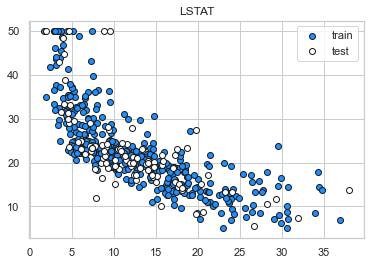

In [18]:
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

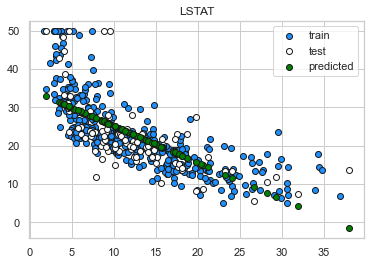

In [19]:
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.scatter(X_test_f, y_test_pred, facecolor="green", edgecolor="k", label="predicted")
plt.title(feature)
plt.legend()
plt.show()

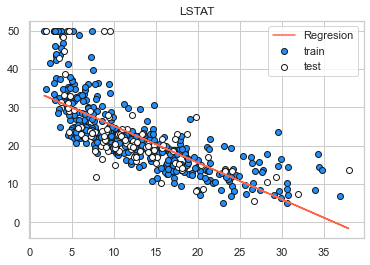

In [20]:
plt.plot(X[:, selector], linear.predict(X[:, selector]), color="tomato", label="Regresion")
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

### 3.5 Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

Podemos observar una relacion con cierta dispersion, que a medida que tenemos mayor porcentaje de pobreza en la poblacion tenemos un menor puntaje. El modelo se ajusta relativamente bien pero creo que un tipo de curva se podria ajustar mejor.
Es decir la feature tiene una relación inversamente proporcional con el variable dependiente.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

### 4.1 Para varios grados de polinomio, haga lo siguiente:

##### 4.1.1 Instancie y entrene una regresión polinomial.
##### 4.1.2 Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
##### 4.1.3 Guarde los errores en una lista.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []

degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for degree in degrees: 
    
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)
    
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)


plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
sns.despine(left=True)
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

### 4.2 Grafique las curvas de error en términos del grado del polinomio.

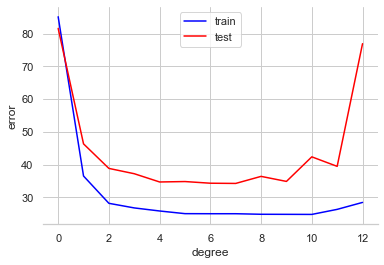

In [22]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
sns.despine(left=True)
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

### 4.3 Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.

Podemos observar que a partir del grado **9** empieza a haber un **sobreajuste** sobre los datos de entrenamiento, ya que el valor del error en test se dispara significativamente.

### 4.4 Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.

In [23]:
min_err = 100
totals = []

for i in degrees:
    total_err = train_errors[i] + test_errors[i]
    if total_err < min_err:
        min_err = total_err
        degree = i
        totals.append(total_err)
        
print(f'El grado con menor error es {degree}, los porcentajes para cada uno de los dataset son los siguientes:')
print(f'Train error: {train_errors[degree]:0.4}')
print(f'Test error: {test_errors[degree]:0.4}')

El grado con menor error es 7, los porcentajes para cada uno de los dataset son los siguientes:
Train error: 25.01
Test error: 34.26


### 4.5 Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

In [24]:
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

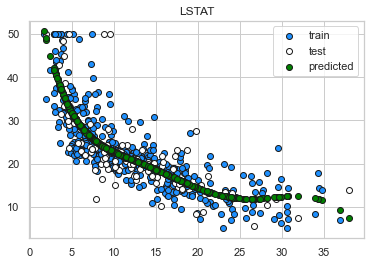

In [25]:
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.scatter(X[:, selector], model.predict(X[:, selector]),  facecolor="green", edgecolor="k", label="predicted")
plt.title(feature)
plt.legend()
plt.show()

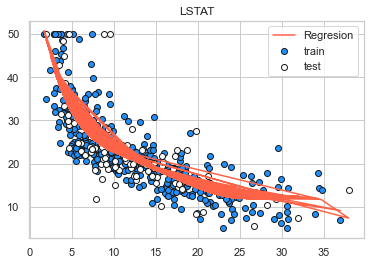

In [26]:
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(X[:, selector], model.predict(X[:, selector]), color="tomato", label="Regresion")
plt.title(feature)
plt.legend()
plt.show()

#### Nota:
Podemos ver a priori que el modelo seleccionado refleja más el comportamiento de los datos dada la curva en forma de j invertida. La cual nos dice que a medida que el porcentaje de población de clase baja (pobreza) aumenta el puntaje dado a la vivienda disminuye.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

### 5.1 Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.

In [27]:
selector =  (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

### 5.2 Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.

In [28]:
train_errors = []
test_errors = []
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for degree in degrees:
    
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    #print
    if test_error < 40:
        print(f'Degree: {degree}' )
        print(f'Train error: {train_error:0.4}')
        print(f'Test error: {test_error:0.4}')

    #save error in lists
    train_errors.append(train_error)
    test_errors.append(test_error)

Degree: 1
Train error: 27.79
Test error: 38.76
Degree: 2
Train error: 15.83
Test error: 31.85


### 5.3 Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

El caso de utilizar los atributos como son CRIM, RM y LSTAT que aparecen como más correlacionados con la variable objetivo en la gráfica se puede observar que el error cuadrático es menor con varios grados menos a la función polinomica. Lo cual hace que arribemos a una solución más fácil, por lo cual el modelo es más simple con estas tres features. 

No hace falta graficar

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [29]:
# Tomas todas las features
X_train_all = X_train[:]
X_test_all = X_test[:]
X_train_all.shape, X_test_all.shape

((404, 13), (102, 13))

In [30]:
train_errors = []
test_errors = []
#degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
degrees = [1, 2, 3, 4, 5, 6]

for degree in degrees:
    
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_all, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_all)
    y_test_pred = model.predict(X_test_all)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    #print
    if test_error < 40:
        print(f'Degree: {degree}' )
        print(f'Train error: {train_error:0.4}')
        print(f'Test error: {test_error:0.4}')

    #save error in lists
    train_errors.append(train_error)
    test_errors.append(test_error)

Degree: 1
Train error: 19.33
Test error: 33.45
Degree: 2
Train error: 6.31
Test error: 25.22


### Nota
Podemos observar que al usar todas las features disminuye significativamente el error tanto en el dataset del grupo de testing como en el de entrenamiento. Tomando solo 2 grados como parámetro del modelo

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

El modelo RIDGE penaliza los valores de los parametros permitiendo una compensacion sesgo-varianza, si bien no lo hace tan flexible al modelo minimiza la varianza del mismo. Por lo tanto el error cuadratico medio se optimiza

In [46]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [47]:
X_train_r = X_train
X_test_r = X_test
X_train_r.shape, X_test_r.shape

((404, 13), (102, 13))

In [48]:
# Se crean los modelos lineales
regr = linear_model.LinearRegression()
regrr = linear_model.RidgeCV(alphas=[0.1,0.2,0.5,1.0,3.0,5.0,10.0])

In [49]:
# Se entrenan los modelos
regr.fit(X_train_r, y_train)
regrr.fit(X_train_r, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.5,  1. ,  3. ,  5. , 10. ]))

In [52]:
print ('Regresión Mínimos Cuadrados Ordinarios')
# Coeficiente
print ('Coeficientes:', regr.coef_)
# MSE
print("Residual sum of squares: %.2f"
 % np.mean((regr.predict(X_test) - y_test) ** 2))
# Varianza Explicada
print('Varianza explicada: %.2f\n' % regr.score(X_test, y_test))

Regresión Mínimos Cuadrados Ordinarios
Coeficientes: [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]
Residual sum of squares: 33.45
Varianza explicada: 0.59



In [53]:
print ('Regresión Ridge')
# Coeficiente
print ('Coeficientes:', regr_r.coef_)
# MSE
print("Residual sum of squares: %.2f"
    % np.mean((regr_r.predict(X_test_r) - y_test) ** 2))
# Varianza explicada
print('Varianza explicada: %.2f\n' % regr_r.score(X_test_r, y_test))

Regresión Ridge
Coeficientes: [-1.16807614e-01  4.60034842e-02 -2.37620690e-02  2.27814972e+00
 -8.55779612e+00  3.75513528e+00 -1.04143035e-02 -1.28009479e+00
  2.22037885e-01 -1.15255734e-02 -9.69288272e-01  8.53481709e-03
 -4.98849035e-01]
Residual sum of squares: 34.23
Varianza explicada: 0.58



### Nota
Comparando los coeficientes de mínimos cuadrados y de Ridge, aún usando diferentes alphas podemos notar que el mejor que se aplica al caso es el MSO Regresión Mínimos Cuadrados Ordinarios, es decir, tenemos como conclusión que el método MCO; mínimo cuadrados ordinarios, es el que mejor se ajusta a nuestros datos. En este caso uno se pregunta sobre la ventaja de usar otro método para la regresión lineal, si los resultados son favorables para la técnica más conocida.